# Project: Concrete Strength Prediction

## Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply
feature engineering and model tuning to obtain 80% to 95% of R2score.

# Resources Available  
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learningdatabases/concrete/compressive/. The same has been shared along with the course content. 

# Content

Attribute Information:

    Cement (cement) - kg/m3 mixture 

    Blast Furnace Slag (slag) - kg/m3 mixture 
    
    Fly Ash (ash) - kg/m3 mixture
    
    Water (water) - kg/m3 mixture
    
    Superplasticizer (superplastic) - kg/m3 mixture
    
    Coarse Aggregate (coarseagg) - kg/m3 mixture 
    
    Fine Aggregate (fineagg) - kg/m3 mixture
    
    Age(age) - Day (1~365) 
    
    Concrete compressive strength(strength) -MPa -- Output Variable 

# 1.  Load data & Initial screening

In [1]:
import warnings
import pandas as pd 
import numpy as np
df = pd.read_csv('concrete.csv')
print('Data Size:', df.shape)
df.head()

Data Size: (1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [2]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
# Null data
df.isnull().count()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

<p style="color:red"> There are 1,030 rows of data collection. No null values. Age is given by days.</p>

# 2. Exploration data quality (EDA)

In [4]:
# Unique elements
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [5]:
# Statistic information
round(df.describe(),3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


<p style="color:Blue"> 2.1- Univariate and Bi-variante Analysis</p>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Skew: 0.42


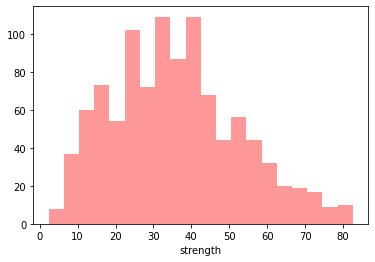

In [7]:
# 1.- Output data analysis
sns.distplot(df.strength, kde=False, bins=20, color='red');
print("Skew:", round(df.strength.skew(),2));

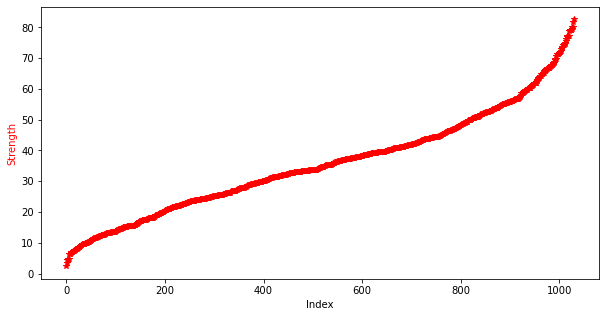

In [9]:
# 1.- Output data analysis
df_st1 = df.sort_values('strength', ascending = True).reset_index(drop=True);
#
x = df_st1.index
y1 = df_st1.strength

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(x, y1, 'r*')

ax1.set_xlabel('Index')
ax1.set_ylabel('Strength', color='r')

plt.show()


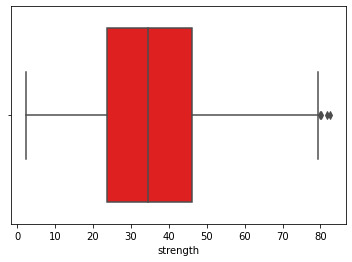

In [10]:
#1- Strength (univariante analysis)
sns.boxplot(df.strength, color="red");

In [11]:
# Outlayers over 80
print('Outlayers :',df.strength[df.strength>80].count())

Outlayers : 3


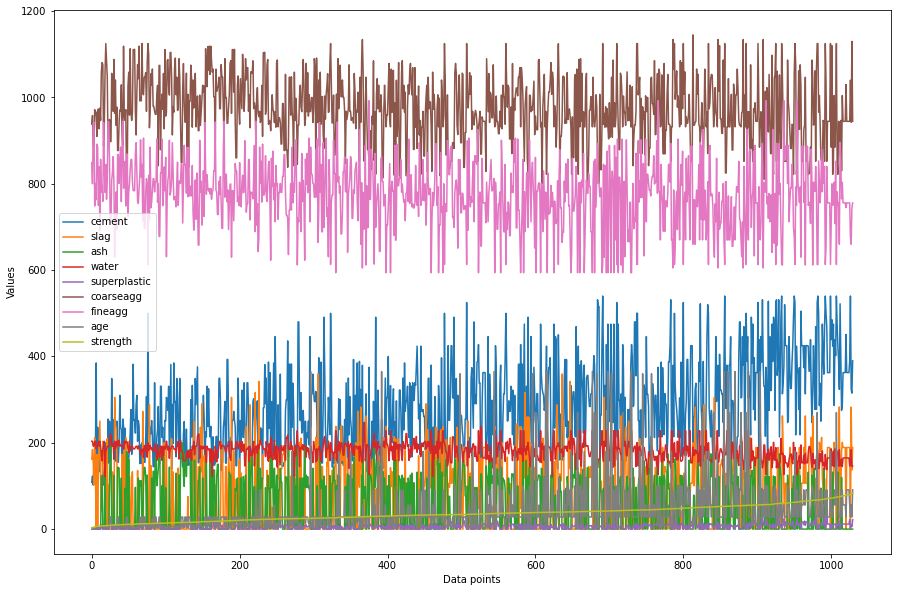

In [12]:
#1 Strength as variable dependent
df_st = df.sort_values('strength', ascending = True).reset_index(drop=True);
df_st.plot(figsize=(15,10));
plt.xlabel("Data points");
plt.ylabel("Values");

In [13]:
# Calculating the percent of material in a m3
list_mat = df.drop(columns=['age','strength'])
list_mat.mean()

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
dtype: float64

In [14]:
# Calculating the percent of material in a m3
list_mat.mean()/(list_mat.mean().sum())*100

cement          11.997656
slag             3.153193
ash              2.312260
water            7.747620
superplastic     0.264758
coarseagg       41.515222
fineagg         33.009292
dtype: float64

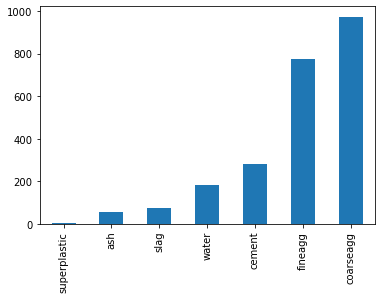

In [15]:
# Calculating the percent of material in the concentration of the mix/m3
list_mat.mean().sort_values().plot(kind='bar');

<p style="color:red"> Obs.: There are 3 data points with strength outlayers over 80 </p>

Skew: 0.51


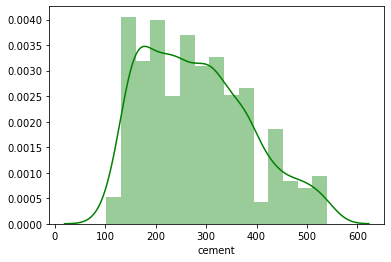

In [16]:
# 2.- Cement (univariante analysis)
sns.distplot(df.cement, kde=True, color='green');
print("Skew:", round(df.cement.skew(),2));

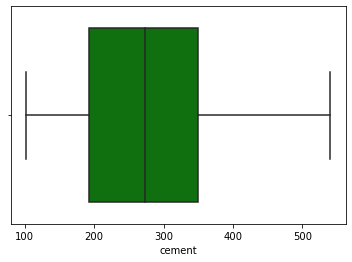

In [17]:
#2.- Cement (univariante analysis)
sns.boxplot(df.cement, color='green');

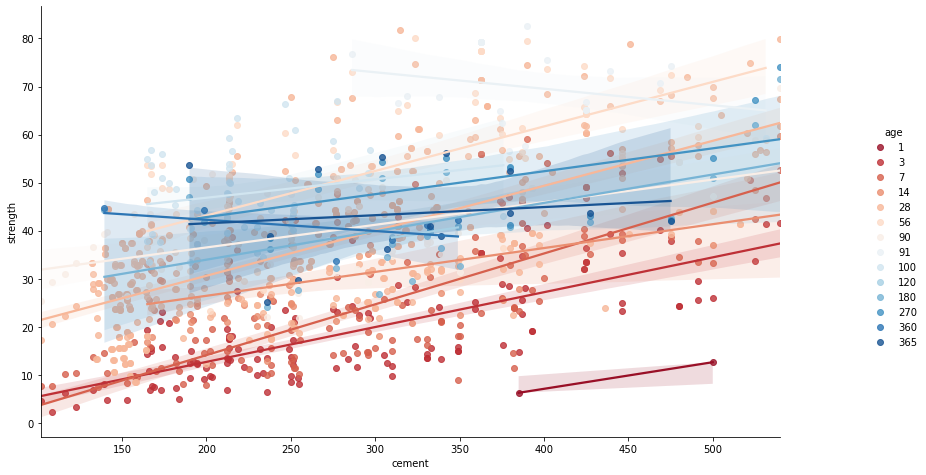

In [18]:
# 2.-Cement (Bi-variante analysis)
sns.lmplot(x='cement', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

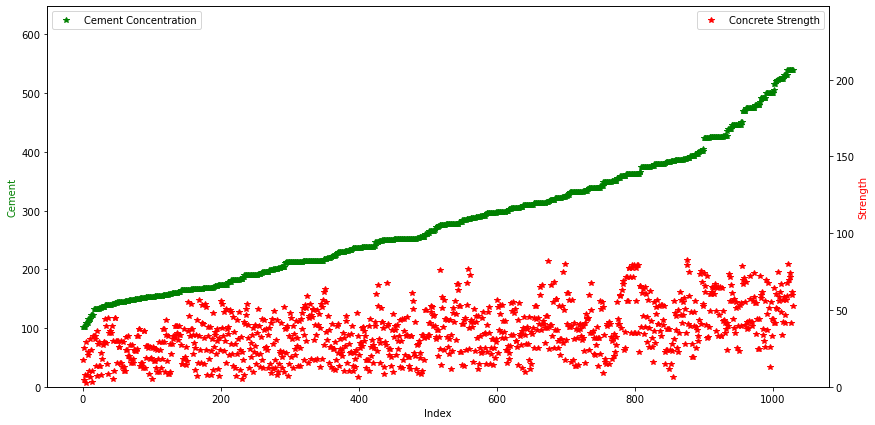

In [19]:
#2 Concrete Strength as variable dependent of cement concentration
df_st2 = df.sort_values('cement', ascending = True).reset_index(drop=True);
#
x = df_st2.index
y1 = df_st2.cement
y2 = df_st2.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'g*',label='Cement Concentration')
ax2.plot(x, y2, 'r*',label='Concrete Strength')


ax1.set_xlabel('Index')
ax1.set_ylabel('Cement', color='g')
ax2.set_ylabel('Strength', color='r')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

max1 = df.cement.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Strength shows an increasing tendency with the cement concentration. No outlayers. Concrete strength converge to aveg. 40 Mpa when increasing the age  </p>

Skew: 0.8


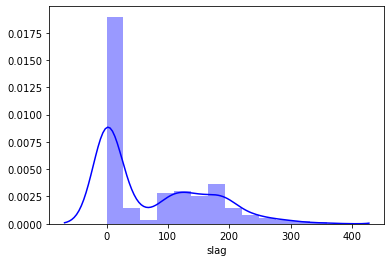

In [20]:
# 3- Blast Furnace Slag (univariante analysis)
sns.distplot(df.slag, kde=True, color='blue');
print("Skew:", round(df.slag.skew(),2));

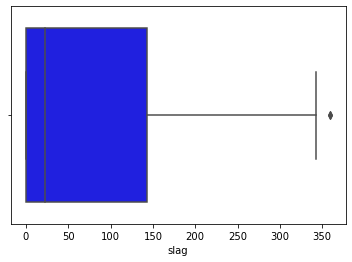

In [21]:
#3.- Slag (univariante analysis)
sns.boxplot(df.slag, color="blue");

In [22]:
#3.-Slag
print('Outlayers :',df.slag[df.slag>350].count())

Outlayers : 2


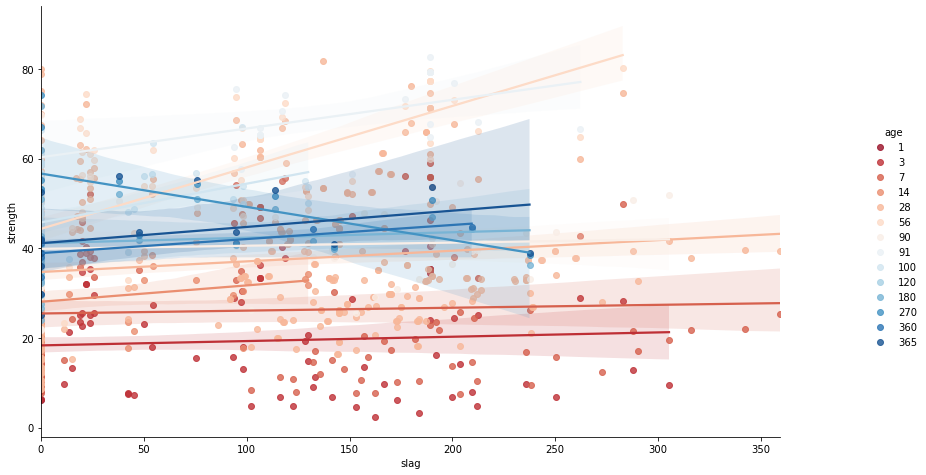

In [23]:
# 3.- Slag (Bi-variante analysis)
sns.lmplot(x='slag', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

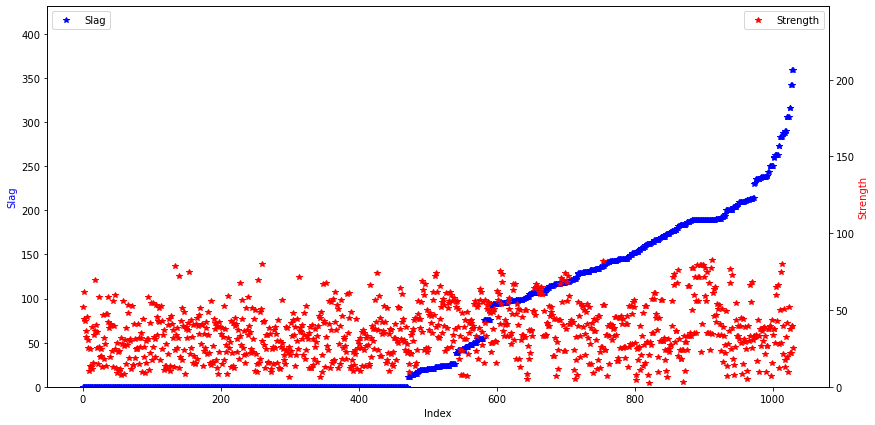

In [24]:
#3 Concrete Strength as variable dependent of Slag concentration
df_st3 = df.sort_values('slag', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.slag
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*', label='Slag')
ax2.plot(x, y2, 'r*', label='Strength')


ax1.set_xlabel('Index')
ax1.set_ylabel('Slag', color='b')
ax2.set_ylabel('Strength', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

max1 = df.slag.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

Data points with zero slag in the mix : 471 of 1030 points
Ave. concrete strength with zero fly slag : 31.6
Ave. concrete strength with fly slag : 39.37


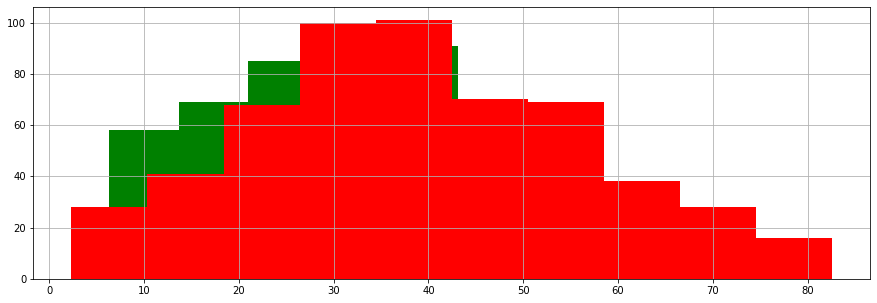

In [25]:
#3.- Concrete strength with & witohut Slag concentration 
print('Data points with zero slag in the mix :',df.slag[df.slag==0].count(),'of', df.shape[0], 'points')
print('Ave. concrete strength with zero fly slag :', round(df[df.slag==0].strength.mean(),2))
print('Ave. concrete strength with fly slag :', round(df[df.slag>0].strength.mean(),2))
df[df.slag==0].strength.hist(color='green');
df[df.slag>0].strength.hist(color='red');
fig = plt.gcf();
fig.set_size_inches(15, 5);

In [26]:
# tree drivers with values equal to zero
df[(df.slag==0) & (df.ash==0) & (df.superplastic==0)].count()

cement          209
slag            209
ash             209
water           209
superplastic    209
coarseagg       209
fineagg         209
age             209
strength        209
dtype: int64

In [27]:
# New Data Frame
df_new = df.copy()

In [28]:
#3 replacing th zero values by the median
med_slag = df.slag[df.slag>0].median()
df_new.slag.loc[df_new.slag==0] = med_slag;

C:\Users\LGRVe\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Skew: 0.25
Mean: 135.95


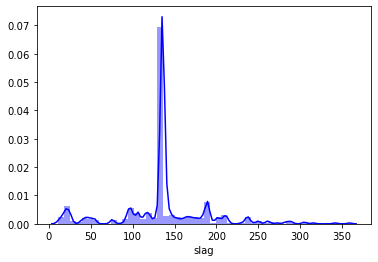

In [29]:
#3 New Plot
sns.distplot(df_new.slag, color='blue');
print("Skew:", round(df_new.slag.skew(),2));
print("Mean:", round(df_new.slag.mean(),2));

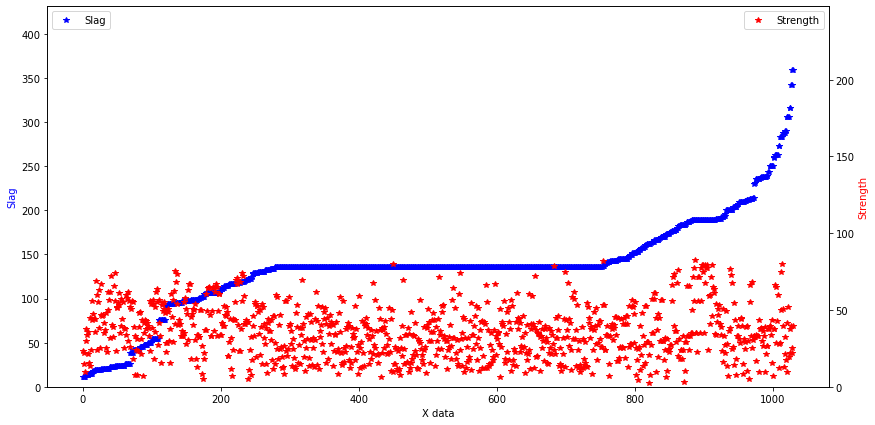

In [30]:
#3 Concrete Strength as variable dependent of Slag concentration
df_st3 = df_new.sort_values('slag', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.slag
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*', label='Slag')
ax2.plot(x, y2, 'r*', label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Slag', color='b')
ax2.set_ylabel('Strength', color='r')

max1 = df_new.slag.max()*1.2
max2 = df_new.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Strength shows an slightly increase tendency with the slag concentration. Two points outlayers. Data has 471 points with zero slag concentration  </p>

Skew: 0.54


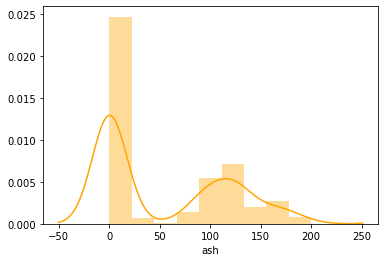

In [31]:
# 4.- Fly Ash (univariante analysis)
sns.distplot(df.ash, kde=True, color='orange');
print("Skew:", round(df.ash.skew(),2));

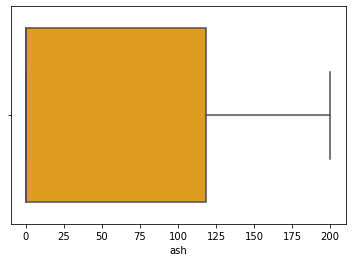

In [32]:
#4.- Fly Ash (univariante analysis)
sns.boxplot(df.ash, color='orange');

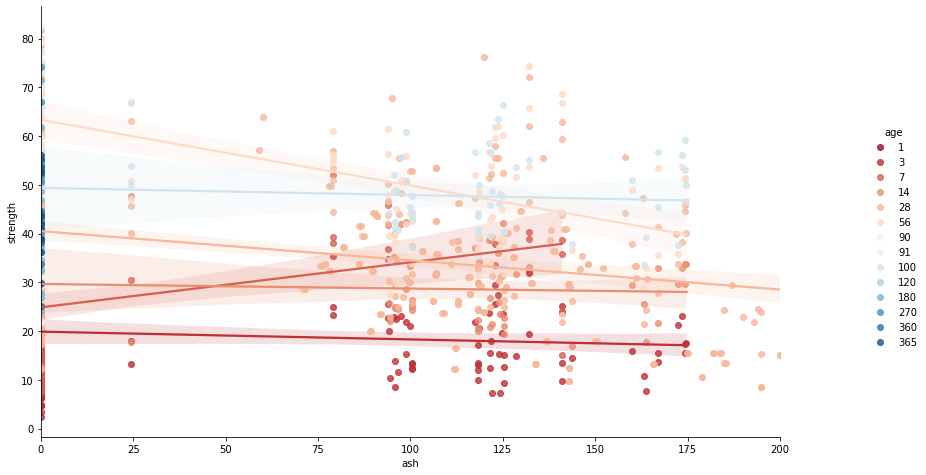

In [33]:
# 4.- Fly Ash (Bi-variante analysis)
sns.lmplot(x='ash', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

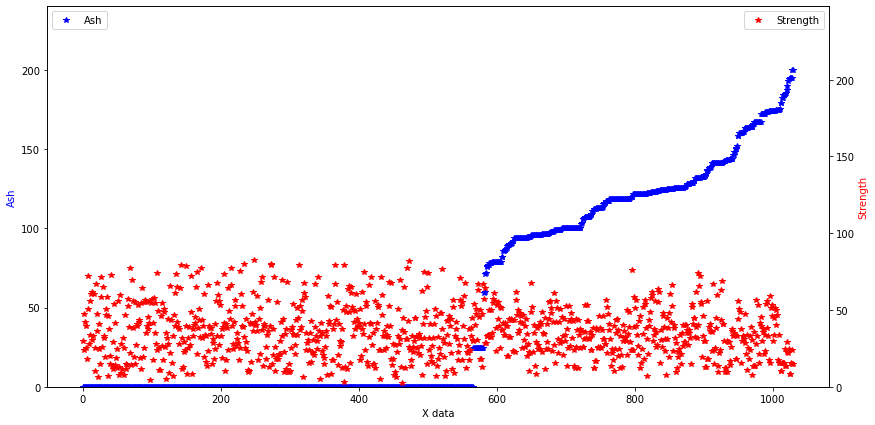

In [34]:
#4 Concrete Strength as variable dependent of fly ash concentration
df_st4 = df.sort_values('ash', ascending = True).reset_index(drop=True);
#
x = df_st4.index
y1 = df_st4.ash
y2 = df_st4.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*', label='Ash')
ax2.plot(x, y2, 'r*', label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Ash', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.ash.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

Data points with zero ash in the mix : 566 of 1030 points
Ave. concrete strength with zero fly ash : 36.77
Ave. concrete strength with fly ash : 34.65


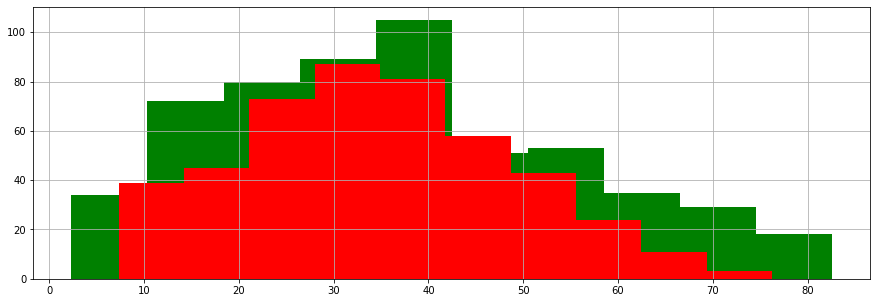

In [35]:
#4.- Zero fly ash
print('Data points with zero ash in the mix :',df.ash[df.ash==0].count(),'of', df.shape[0], 'points')
print('Ave. concrete strength with zero fly ash :', round(df[df.ash==0].strength.mean(),2))
print('Ave. concrete strength with fly ash :', round(df[df.ash>0].strength.mean(),2))
df[df.ash==0].strength.hist(color='green');
df[df.ash>0].strength.hist(color='red');
fig = plt.gcf();
fig.set_size_inches(15, 5);

In [36]:
#4. Replacing Ash zero values with the median of the values higher than zero
med_ash = df.ash[df.ash>0].median()
df_new.ash.loc[df_new.ash==0] = med_ash;

C:\Users\LGRVe\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


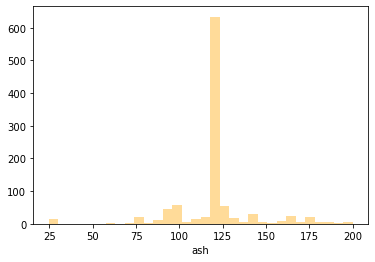

In [37]:
#4 New Plot
sns.distplot(df_new.ash, kde=False, color='orange');

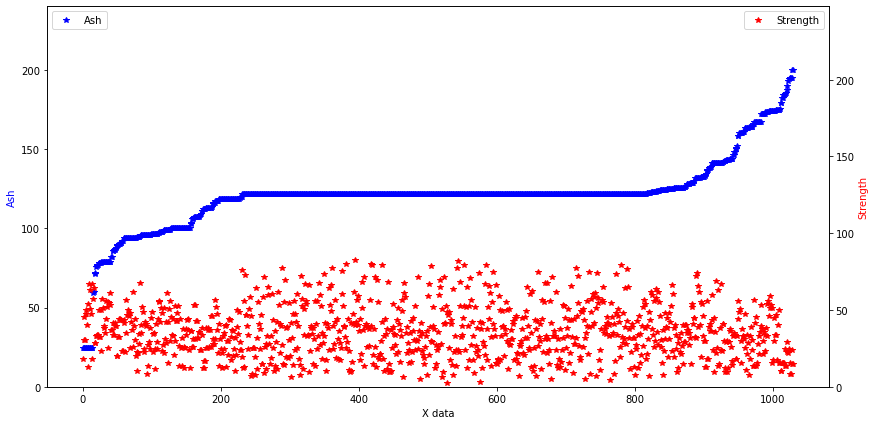

In [38]:
#4 Concrete Strength as variable dependent of Ash concentration
df_st3 = df_new.sort_values('ash', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.ash
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Ash')
ax2.plot(x, y2, 'r*', label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Ash', color='b')
ax2.set_ylabel('Strength', color='r')

max1 = df_new.ash.max()*1.2
max2 = df_new.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Strength shows slightly decreasing tendency with the ash concentration. No outlayers. Data has 566 points with zero ash concentration</p>

Skew: 0.07


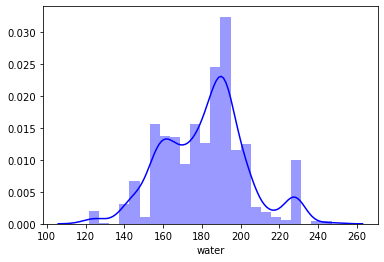

In [39]:
# 5.- Water (univariante analysis)
sns.distplot(df.water, kde=True, color='blue');
print("Skew:", round(df.water.skew(),2));

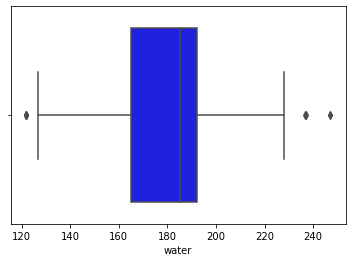

In [40]:
#5.- water outlayers (univariante analysis)
sns.boxplot(df.water, color='blue');

In [41]:
#5.-Water
print('Outlayers above 230:',df.water[df.water>230].count())
print('Outlayers below 125:',df.water[df.water<125].count())

Outlayers above 230: 4
Outlayers below 125: 5


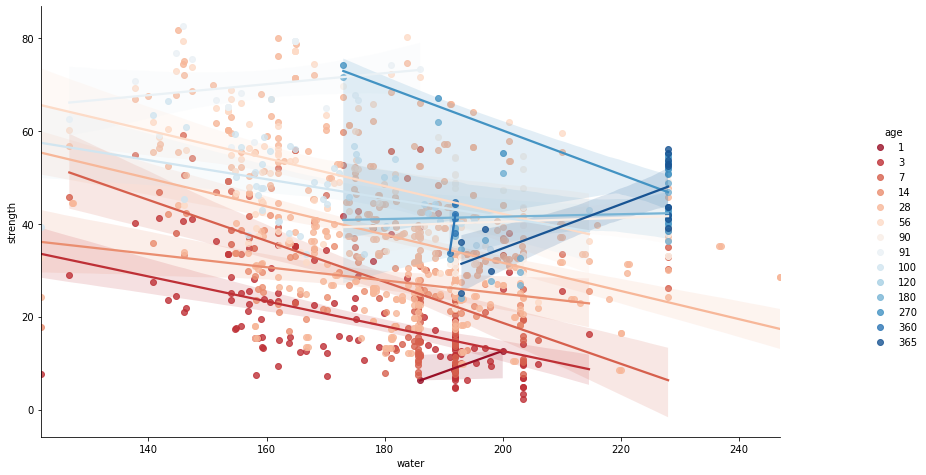

In [42]:
#5.- Water (Bi-variante analysis)
sns.lmplot(x='water', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

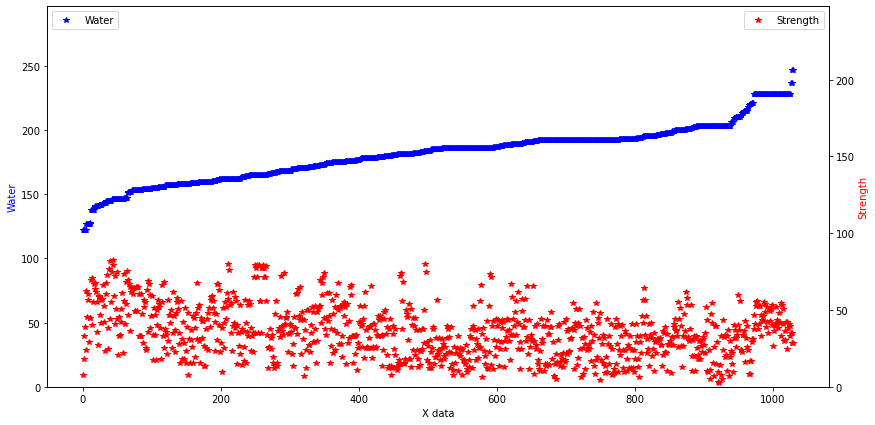

In [43]:
#5 Concrete Strength as variable dependent of water concentration
df_st5 = df.sort_values('water', ascending = True).reset_index(drop=True);
#
x = df_st5.index
y1 = df_st5.water
y2 = df_st5.strength

fig, ax1 = plt.subplots(figsize=(14,7))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Water')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Water', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.water.max()*1.2
max2 = df.strength.max()*3
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength shows decreasing tendency with the water concentration. 9 outlayers in both sides.</p>

Skew: 0.91


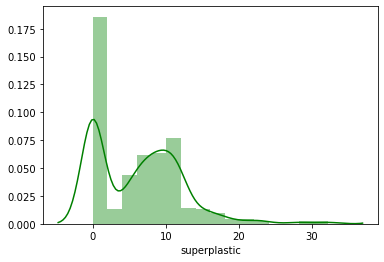

In [44]:
# 6.- Superplastic (univariante analysis)
sns.distplot(df.superplastic, kde=True, color='green');
print("Skew:", round(df.superplastic.skew(),2));

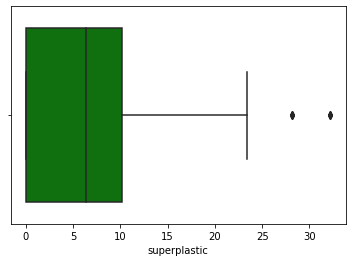

In [45]:
#6.- superplastic (univariante analysis)
sns.boxplot(df.superplastic, color='green');

In [46]:
#6.- Superplastic
print('Outlayers above 25:',df.superplastic[df.superplastic>25].count())

Outlayers above 25: 10


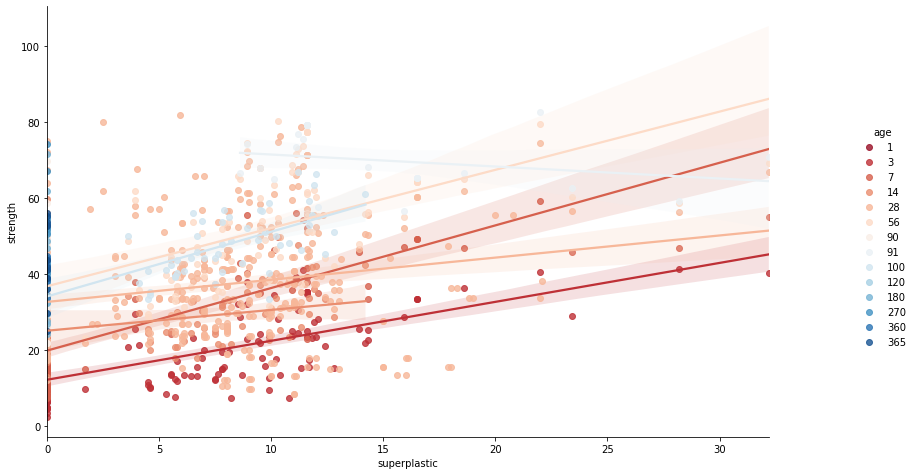

In [47]:
#6.- Superplastic (Bi-variante analysis)
sns.lmplot(x='superplastic', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

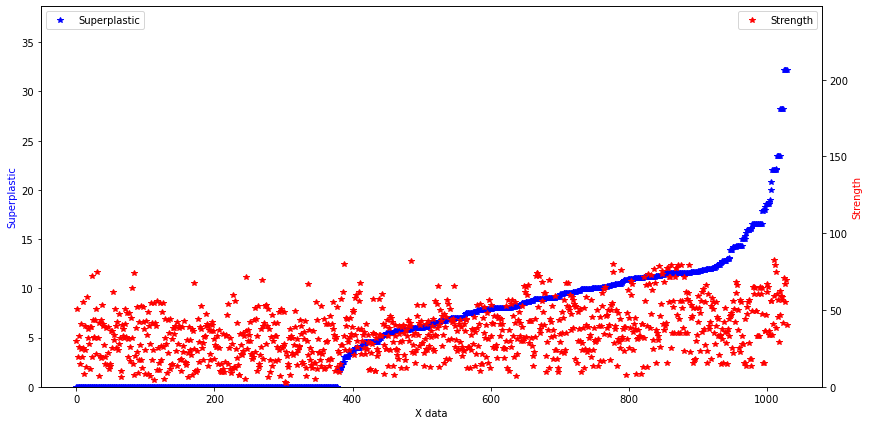

In [48]:
#6 Concrete Strength as variable dependent of superplastic concentration
df_st6 = df.sort_values('superplastic', ascending = True).reset_index(drop=True);
#
x = df_st6.index
y1 = df_st6.superplastic
y2 = df_st6.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Superplastic')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax1.set_xlabel('X data')
ax1.set_ylabel('Superplastic', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.superplastic.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

Data points with zero superplastic in the mix : 379 of 1030 points
Ave. concrete strength with zero superplastic : 29.52
Ave. concrete strength with superplastic : 39.49


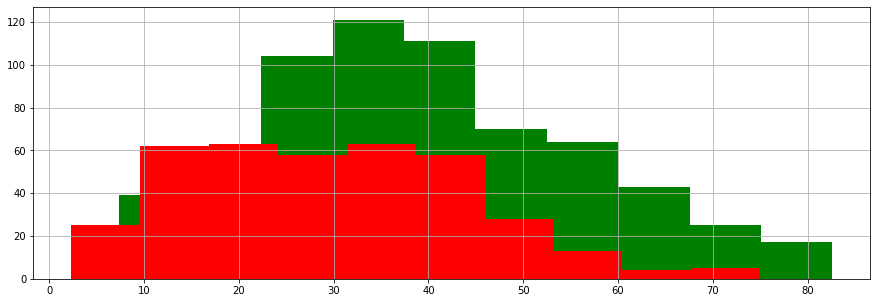

In [49]:
#6.- Superplastic
print('Data points with zero superplastic in the mix :',df.superplastic[df.superplastic==0].count(),'of', df.shape[0], 'points')
print('Ave. concrete strength with zero superplastic :', round(df[df.superplastic==0].strength.mean(),2))
print('Ave. concrete strength with superplastic :', round(df[df.superplastic>0].strength.mean(),2))
df[df.superplastic>0].strength.hist(color='green');
df[df.superplastic==0].strength.hist(color='red');
fig = plt.gcf();
fig.set_size_inches(15, 5);

In [50]:
#6. Replacing Ash zero values with the median of the values higher than zero
med_super = df.superplastic[df.superplastic>0].median()
df_new.superplastic.loc[df_new.superplastic==0] = med_super;

C:\Users\LGRVe\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


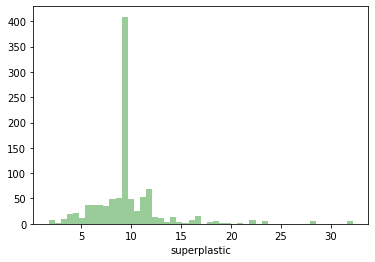

In [51]:
#6 New Plot
sns.distplot(df_new.superplastic, kde=False, color='green');

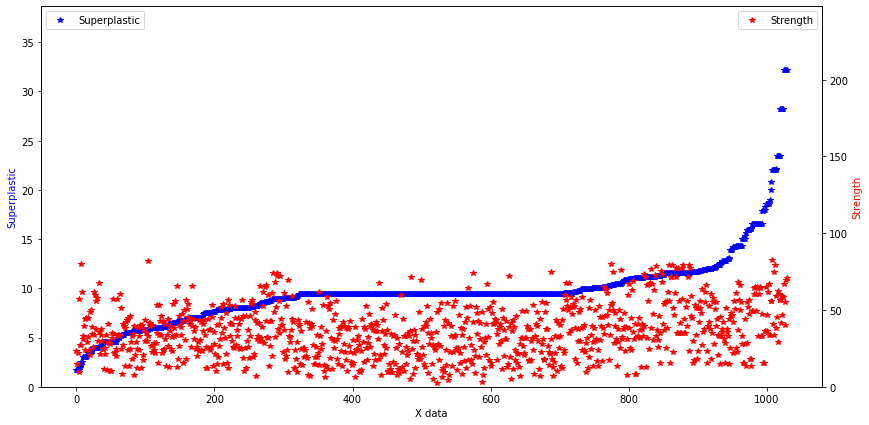

In [52]:
#6 Concrete Strength as variable dependent of Superplastic concentration
df_st3 = df_new.sort_values('superplastic', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.superplastic
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Superplastic')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Superplastic', color='b')
ax2.set_ylabel('Strength', color='r')

max1 = df_new.superplastic.max()*1.2
max2 = df_new.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength shows increasing tendency with the superplastic concentration. 10 outlayers.</p>

Skew: -0.04


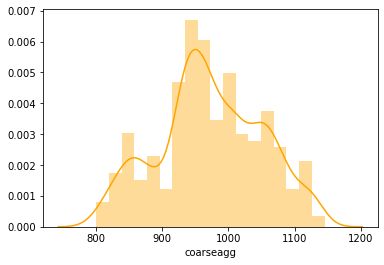

In [53]:
#7.- Coarse aggregate (univariante analysis)
sns.distplot(df.coarseagg, kde=True, color='orange');
print("Skew:", round(df.coarseagg.skew(),2));

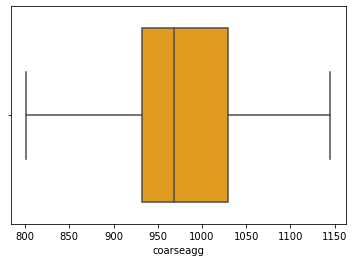

In [54]:
#7.- Coarse aggregate (univariante analysis)
sns.boxplot(df.coarseagg, color='orange');

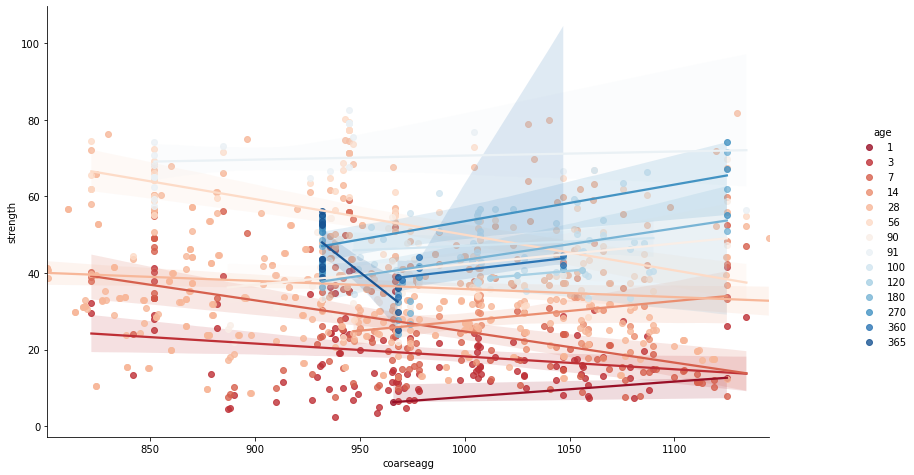

In [55]:
#7.- Coarse Aggregate (Bi-variante analysis)
sns.lmplot(x='coarseagg', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

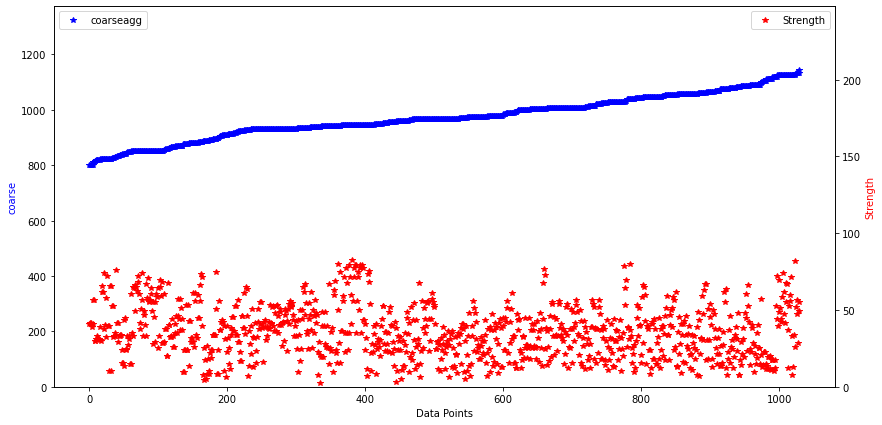

In [56]:
#7 Concrete Strength as variable dependent of coarse aggregate concentration
df_st7 = df.sort_values('coarseagg', ascending = True).reset_index(drop=True);
#
x = df_st7.index
y1 = df_st7.coarseagg
y2 = df_st7.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='coarseagg')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax1.set_xlabel('Data Points')
ax1.set_ylabel('coarse', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.coarseagg.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength doesnot shows tendency with the coarse aggregate concentration. No outlayers.</p>

Skew: -0.25


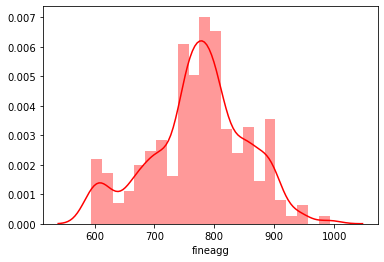

In [57]:
#8.- Fine aggregate (univariante analysis)
sns.distplot(df.fineagg, kde=True, color='red');
print("Skew:", round(df.fineagg.skew(),2));

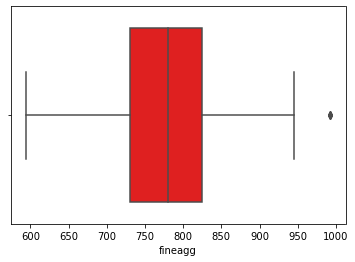

In [58]:
#8.- Fine aggregate (univariante analysis)
sns.boxplot(df.fineagg, color='red');

In [59]:
#8.- Fine aggregate
print('Outlayers above 950:',df.fineagg[df.fineagg>950].count())

Outlayers above 950: 5


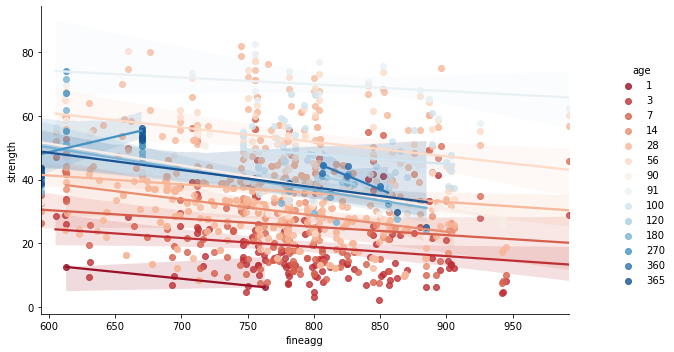

In [60]:
#8.- Fine Aggregate (Bi-variante analysis)
sns.lmplot(x='fineagg', y='strength', data=df, hue='age', palette="RdBu");
fig = plt.gcf()
fig.set_size_inches(10, 5)

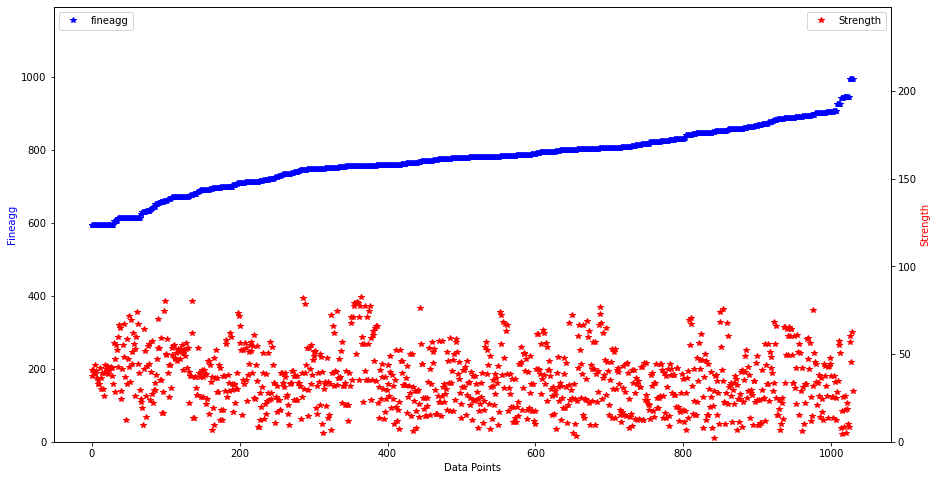

In [61]:
#8 Concrete Strength as variable dependent of fine aggregate concentration
df_st8 = df.sort_values('fineagg', ascending = True).reset_index(drop=True);
#
x = df_st8.index
y1 = df_st8.fineagg
y2 = df_st8.strength

fig, ax1 = plt.subplots(figsize=(15,8))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='fineagg')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('Data Points')
ax1.set_ylabel('Fineagg', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.fineagg.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength shows sligthly drop tendency with the fine aggregate concentration. 5 points outlayers.</p>

Skew: 3.27


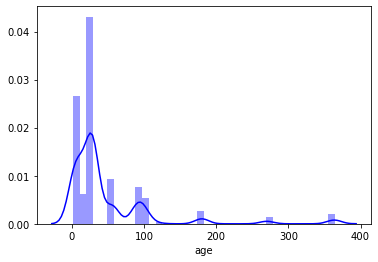

In [62]:
#9.- Age (univariante analysis)
sns.distplot(df.age, kde=True, color='blue');
print("Skew:", round(df.age.skew(),2));

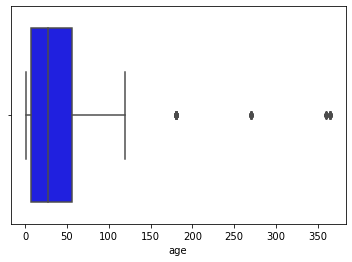

In [63]:
#9.- Age (univariante analysis)
sns.boxplot(df.age, color='blue');

In [64]:
#9.- Age
print('Outlayers above 150:',df.age[df.age>150].count())

Outlayers above 150: 59


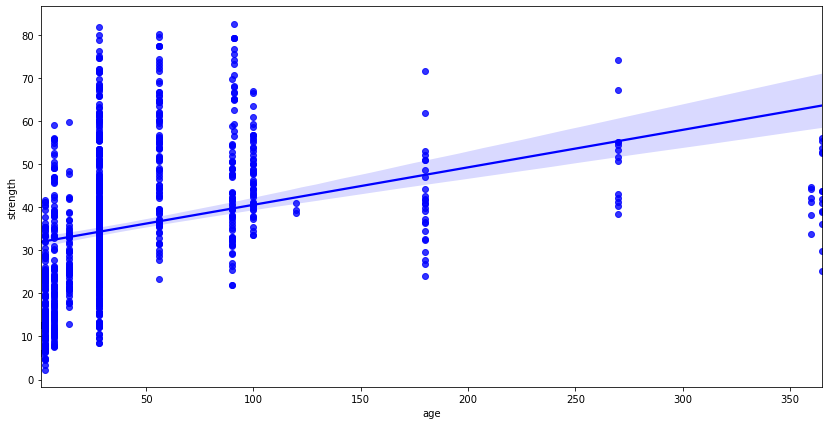

In [65]:
#9.- Age (Bi-variante analysis)
sns.regplot(x='age', y='strength', data=df, color='blue');
fig = plt.gcf()
fig.set_size_inches(14,7 )

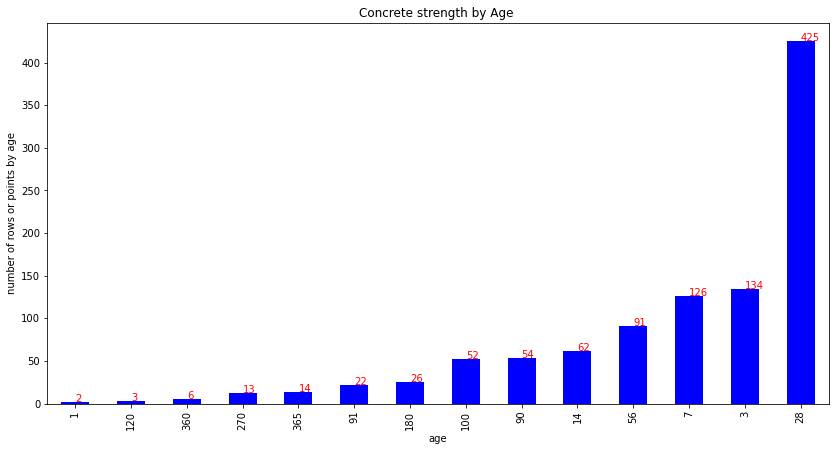

In [543]:

cust_z =df.groupby('age').age.count().sort_values()
cust_z.plot(kind='bar', title='Concrete strength by Age ', color='b', figsize=(14,7))
plt.ylabel('number of rows or points by age')
for i, v in enumerate(cust_z):
    plt.text(i, v, int(v),color='r')

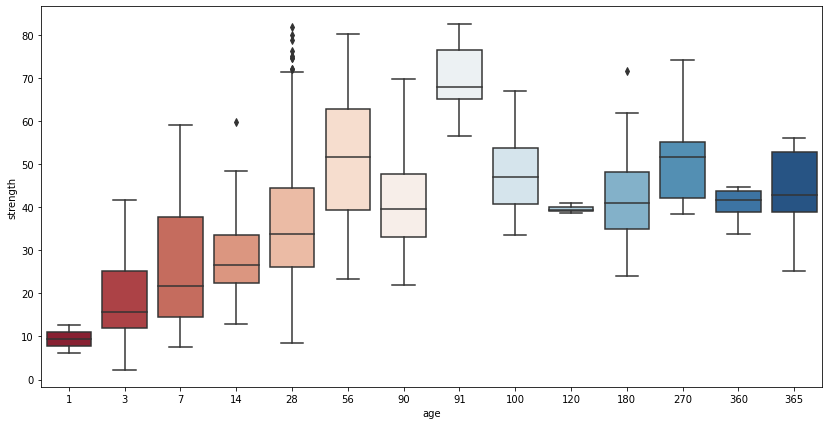

In [67]:
#9.- Age (Bi-variante analysis)
sns.boxplot(x='age', y='strength', data=df, palette="RdBu");
fig = plt.gcf()
fig.set_size_inches(14, 7)

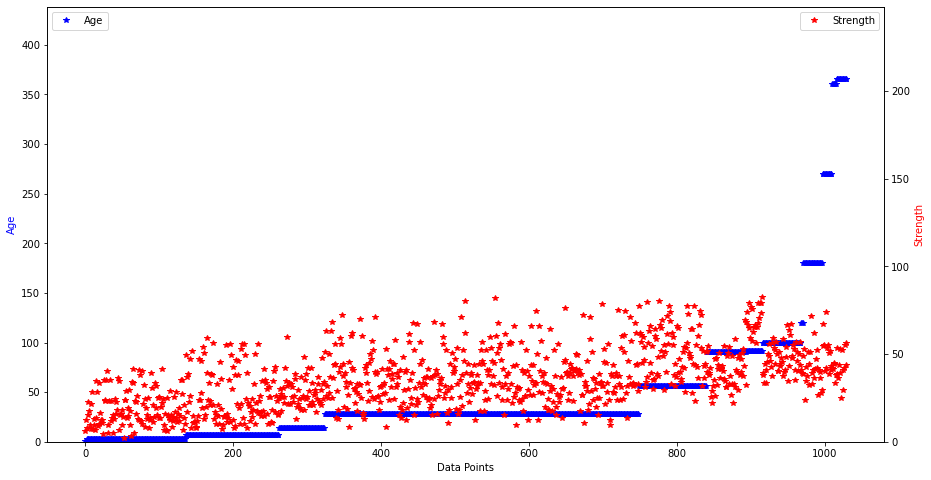

In [68]:
#9 Concrete Strength as variable dependent of age
df_st9 = df.sort_values('age', ascending = True).reset_index(drop=True);
#
x = df_st9.index
y1 = df_st9.age
y2 = df_st9.strength

fig, ax1 = plt.subplots(figsize=(15,8))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Age')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax1.set_xlabel('Data Points')
ax1.set_ylabel('Age', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.age.max()*1.2
max2 = df.strength.max()*3
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength shows a covergency to 40 Mpa with the age.</p>

<p style="color:Blue"> 2.2- Feature Engineering Techniques</p>

In [69]:
print('Slag with zero values (%) :', round(df.slag[df.slag==0].count()*100/df.shape[0],2))
print('Ash with zero values (%) :', round(df.ash[df.ash==0].count()*100/df.shape[0],2))
print('Superplastic with zero values (%) :', round(df.superplastic[df.superplastic==0].count()*100/df.shape[0],2))

Slag with zero values (%) : 45.73
Ash with zero values (%) : 54.95
Superplastic with zero values (%) : 36.8


   <p style="color:orange"> 2.2.1.- Data input with zero values</p> 
    
    Models will be run taking in consideration the following: Slag, Ash and Superplastic
    
        Case 1: Initial data as it is
    
        Case 2: Apply Up-Scaling (SMOTE) to replace zero values
    
        Case 3: Dropping those 3 variables 

<p style="color:orange"> 2.2.2.- Separate independent and dependent variables</p> 

In [70]:
# Independentes variables
X=df.drop(columns=['strength'])
y=df.strength
print("X.shape :",X.shape)
print("y.shape :",y.shape)
X.head()

X.shape : (1030, 8)
y.shape : (1030,)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


<p style="color:orange"> 2.2.3.- Scale all the columns </p>

In [71]:
from sklearn import preprocessing
#
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


<p style="color:orange"> 2.2.4- Split the data into: train, validation, and test </p>

In [72]:
from sklearn.model_selection import train_test_split
# Split full data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)

   <p style="color:orange"> 2.2.5.- High Correlated Drivers</p> 

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif = pd.DataFrame()

vif["vif"] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]

vif["features"] = X_scaled.columns
vif.sort_values(by='vif', ascending=False, inplace=True)
vif

,vif,features
0,7.488944,cement
1,7.276963,slag
6,7.005081,fineagg
3,7.003957,water
2,6.170634,ash
5,5.074617,coarseagg
4,2.963776,superplastic
7,1.118367,age


<p style="color:orange"> 2.2.6- Evaluating statsmodel and p values </p>

In [75]:
# Joing train data
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
772,-0.661217,-0.856888,1.053868,-0.059375,-0.084519,1.089619,0.071372,-0.501465,20.92
997,-1.121700,1.033242,1.153921,0.723052,0.300680,-0.153365,-1.654422,-0.279733,27.23
724,0.959567,-0.856888,-0.847144,0.193626,-1.039143,1.694384,0.133765,-0.279733,22.49
167,-1.041283,-0.699184,1.848041,-1.160394,-0.352484,0.429525,1.033473,0.860604,37.68
764,-1.246155,-0.856888,2.045021,-0.682505,1.640502,1.300643,-1.192713,-0.279733,13.46


In [76]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+\
                        fineagg+age', data = data_train).fit()

In [77]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          6.69e-146
Time:                        14:15:04   Log-Likelihood:                -2704.2
No. Observations:                 721   AIC:                             5426.
Df Residuals:                     712   BIC:                             5468.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.9632      0.386     93.152   

<p style="color:Blue"> 2.3- Linear regression and three shrinkage methods (Full data)</p>

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

<p style="color:orange"> 2.3.1- Linear regression model </p>

In [79]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept is {}".format(round(intercept),3))
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coeff. for {} is   :{}".format(col_name, round(regression_model.coef_[idx],3)))

The intercept is 36.0
The coeff. for cement is   :11.734
The coeff. for slag is   :7.856
The coeff. for ash is   :5.165
The coeff. for water is   :-3.36
The coeff. for superplastic is   :2.312
The coeff. for coarseagg is   :1.058
The coeff. for fineagg is   :1.17
The coeff. for age is   :7.477


In [81]:
# Train data score
print('Linear Regression - Train score :',round(regression_model.score(X_train, y_train),4))
# Validation data score
print('Linear Regression - Validation score :',round(regression_model.score(X_test, y_test),4))


Linear Regression - Train score : 0.6245
Linear Regression - Validation score : 0.5848


<p style="color:orange"> 2.3.2- RIDGE model - Shrinkage method </p>

In [82]:
ridge = Ridge(alpha=0.3)
ridge_model = ridge.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
ridge_coefs = dict(zip(['Intercept'] + df.columns.tolist()[:-1], 
        np.round(np.concatenate((ridge_model.intercept_, ridge_model.coef_), 
                                axis=None), 3)))

print('Ridge Regression coefficients:')
ridge_coefs

Ridge Regression coefficients:


{'Intercept': 35.964,
 'cement': 11.667,
 'slag': 7.791,
 'ash': 5.106,
 'water': -3.404,
 'superplastic': 2.313,
 'coarseagg': 1.014,
 'fineagg': 1.112,
 'age': 7.471}

In [83]:
print('Ridge Model - Train Score =',round(ridge.score(X_train, y_train),4))
print('Ridge Model - Validation Score =',round(ridge.score(X_test, y_test),4))

Ridge Model - Train Score = 0.6245
Ridge Model - Validation Score = 0.5846


<p style="color:orange"> 2.3.3- LASSO model - Shrinkage method </p>

In [84]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_coefs = dict(
    zip(['Intercept'] + df.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3)))

print('LASSO coefficients:')
lasso_coefs

LASSO coefficients:


{'Intercept': 35.97,
 'cement': 10.288,
 'slag': 6.397,
 'ash': 3.858,
 'water': -4.259,
 'superplastic': 2.262,
 'coarseagg': 0.0,
 'fineagg': -0.0,
 'age': 7.29}

In [85]:
print('LASSO model - Train score =', round(lasso.score(X_train, y_train),4))
print('LASSO model - Validation score =',round(lasso.score(X_test, y_test),4))

LASSO model - Train score = 0.6232
LASSO model - Validation score = 0.5802


<p style="color:orange"> 2.3.4- ElasticNet model - Shrinkage method </p>

Combine RIDGE and LASSO models

In [86]:
elastic_net = ElasticNet(alpha=0.05)
elastic_net_model = elastic_net.fit(X_train, y_train)
elastic_net_prediction = elastic_net_model.predict(X_test)
elastic_net_coefs = dict(
    zip(['Intercept'] + df.columns.tolist()[:-1], 
        np.round(np.concatenate((elastic_net_model.intercept_, 
                                 elastic_net_model.coef_), axis=None), 3)))
print('Elastic Net coefficients:')
elastic_net_coefs

Elastic Net coefficients:


{'Intercept': 35.98,
 'cement': 9.301,
 'slag': 5.489,
 'ash': 3.012,
 'water': -4.599,
 'superplastic': 2.539,
 'coarseagg': -0.358,
 'fineagg': -0.744,
 'age': 7.124}

In [87]:
print('ElasticNet model - Train score =', round(elastic_net.score(X_train, y_train),4))
print('Elastic model - Validation score =',round(elastic_net.score(X_test, y_test),4))

ElasticNet model - Train score = 0.6211
Elastic model - Validation score = 0.5747


<p style="color:Blue"> 2.4- Polynomial models reflecting the non-linear interaction between some dimensions (Full data)</p>

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [90]:
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=0)
X_poly.shape

(1030, 37)

<p style="color:orange"> 2.4.1- Linear regression model (Polynomial)</p>

In [91]:
regression_model.fit(X_train, y_train)
# Train data score
print('Linear Regression - Train score :',round(regression_model.score(X_train, y_train),4))
# Validation data score
print('Linear Regression - Validation score :',round(regression_model.score(X_test, y_test),4))

Linear Regression - Train score : 0.7686
Linear Regression - Validation score : 0.7055


<p style="color:orange"> 2.4.2- RIDGE model - Shrinkage method (Polynomial)</p>

In [92]:
ridge = Ridge(alpha=0.3)
ridge_model = ridge.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
print('Ridge Model - Train Score =',round(ridge.score(X_train, y_train),4))
print('Ridge Model - Validation Score =',round(ridge.score(X_test, y_test),4))
#ridge.coef_

Ridge Model - Train Score = 0.7686
Ridge Model - Validation Score = 0.7052


<p style="color:orange"> 2.4.3- LASSO model - Shrinkage method (Polynomial)</p>

In [93]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
print('LASSO model - Train score =', round(lasso.score(X_train, y_train),4))
print('LASSO model - Validation score =',round(lasso.score(X_test, y_test),4))

LASSO model - Train score = 0.7607
LASSO model - Validation score = 0.6984


<p style="color:orange"> 2.4.4- ElasticNet model - Shrinkage method (Polynomial)</p>

Combine RIDGE and LASSO models

In [94]:
elastic_net = ElasticNet(alpha=0.05)
elastic_net_model = elastic_net.fit(X_train, y_train)
print('ElasticNet model - Train score =', round(elastic_net.score(X_train, y_train),4))
print('Elastic model - Validation score =',round(elastic_net.score(X_test, y_test),4))

ElasticNet model - Train score = 0.7596
Elastic model - Validation score = 0.6931


<p style="color:Blue"> 2.5- Linear regression and three shrinkage methods (Filling zero values with median)</p>

In [95]:
# Independentes variables
X=df_new.drop(columns=['strength'])
y=df_new.strength
# Scaling data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# Split data
# Split data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)
# Split train data between actual_train and validation
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [96]:
# High correlated variables
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif.sort_values(by='vif', ascending=False, inplace=True)
vif

,vif,features
3,2.042646,water
6,1.713519,fineagg
4,1.502171,superplastic
0,1.486541,cement
5,1.317980,coarseagg
1,1.205466,slag
7,1.127633,age
2,1.108367,ash


In [97]:
# Joing train data
data_train = pd.concat([X_train, y_train], axis=1)
#
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+\
                        fineagg+age', data = data_train).fit()
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          2.06e-141
Time:                        14:15:18   Log-Likelihood:                -2714.7
No. Observations:                 721   AIC:                             5447.
Df Residuals:                     712   BIC:                             5489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.0010      0.392     91.898   

<p style="color:Orange"> 2.5.1.- Linear regression (Filling zero values with median)</p>

In [98]:
# Linear regression
regression_model.fit(X_train, y_train)
#
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept is {}".format(round(intercept),3))
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coeff. for {} is   :{}".format(col_name, round(regression_model.coef_[idx],3)))
print('\n')
# Train data score
print('Linear Regression - Train score :',round(regression_model.score(X_train, y_train),4))
# Validation data score
print('Linear Regression - Validation score :',round(regression_model.score(X_test, y_test),4))

The intercept is 36.0
The coeff. for cement is   :5.025
The coeff. for slag is   :1.019
The coeff. for ash is   :-2.415
The coeff. for water is   :-11.517
The coeff. for superplastic is   :-1.795
The coeff. for coarseagg is   :-5.584
The coeff. for fineagg is   :-6.265
The coeff. for age is   :7.603


Linear Regression - Train score : 0.6134
Linear Regression - Validation score : 0.5727


<p style="color:orange"> 2.5.2- LASSO model - Shrinkage method (Filling zero values with median)</p>

In [99]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_coefs = dict(
    zip(['Intercept'] + df_new.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3)))

print('LASSO coefficients:')
lasso_coefs

LASSO coefficients:


{'Intercept': 36.003,
 'cement': 4.958,
 'slag': 0.842,
 'ash': -2.277,
 'water': -11.04,
 'superplastic': -1.467,
 'coarseagg': -5.298,
 'fineagg': -6.02,
 'age': 7.405}

In [100]:
print('LASSO model - Train score =', round(lasso.score(X_train, y_train),4))
print('LASSO model - Validation score =',round(lasso.score(X_test, y_test),4))

LASSO model - Train score = 0.6127
LASSO model - Validation score = 0.5687


<p style="color:orange"> 2.5.3- LASSO model - Shrinkage method (Filling zero values with median- Polynomial)</p>

In [101]:
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=0)
# Split train data between actual train and validation
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
#
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
print('LASSO model - Train score =', round(lasso.score(X_train, y_train),4))
print('LASSO model - Validation score =',round(lasso.score(X_test, y_test),4))

LASSO model - Train score = 0.7339
LASSO model - Validation score = 0.6528


<p style="color:Blue"> 2.6- Linear regression and LASSO shrinkage method (Dropping Ash, Slag, and Superplastic)</p>

In [102]:
# data frame without Ash, slag and superplastic
df_comp = df.copy()
df_comp.shape

(1030, 9)

In [103]:
 # Dropping variables
df_comp.drop(columns=['ash','slag','superplastic'], inplace=True)

In [104]:
df_comp.shape

(1030, 6)

In [105]:
# Independentes variables
X=df_comp.drop(columns=['strength'])
y=df_comp.strength
# Scaling data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# Split data
# Split data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)
# Split train data between actual_train and validation
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [106]:
# High correlated variables
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif.sort_values(by='vif', ascending=False, inplace=True)
vif

,vif,features
1,1.594056,water
3,1.565999,fineagg
2,1.205428,coarseagg
0,1.179747,cement
4,1.101697,age


In [107]:
# Joing train data
data_train = pd.concat([X_train, y_train], axis=1)
#
lm1 = smf.ols(formula= 'strength ~ cement+water+coarseagg+\
                        fineagg+age', data = data_train).fit()
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          2.69e-134
Time:                        14:15:21   Log-Likelihood:                -2739.3
No. Observations:                 721   AIC:                             5491.
Df Residuals:                     715   BIC:                             5518.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0200      0.404     89.087      0.0

<p style="color:Orange"> 2.6.1.- Linear regression (Dropping variables)</p>

In [108]:
# Linear regression
regression_model.fit(X_train, y_train)
#
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept is {}".format(round(intercept),3))
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coeff. for {} is   :{}".format(col_name, round(regression_model.coef_[idx],3)))
print('\n')
# Train data score
print('Linear Regression - Train score :',round(regression_model.score(X_train, y_train),4))
# Validation data score
print('Linear Regression - Validation score :',round(regression_model.score(X_test, y_test),4))

The intercept is 36.0
The coeff. for cement is   :4.984
The coeff. for water is   :-10.119
The coeff. for coarseagg is   :-4.986
The coeff. for fineagg is   :-5.891
The coeff. for age is   :7.254


Linear Regression - Train score : 0.586
Linear Regression - Validation score : 0.5239


<p style="color:Orange"> 2.6.2.- LASSO Model (Dropping variables)</p>

In [109]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_coefs = dict(
    zip(['Intercept'] + df_comp.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3)))

print('LASSO coefficients:')
lasso_coefs

LASSO coefficients:


{'Intercept': 36.021,
 'cement': 4.995,
 'water': -9.844,
 'coarseagg': -4.789,
 'fineagg': -5.649,
 'age': 7.112}

In [110]:
print('LASSO model - Train score =', round(lasso.score(X_train, y_train),4))
print('LASSO model - Validation score =',round(lasso.score(X_test, y_test),4))

LASSO model - Train score = 0.5857
LASSO model - Validation score = 0.5243


# 3.- K-Fold Cross Validation Tehnique

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

<p style="color:Orange"> 3.1.- Linear regression - K-Fold Cross Validation</p>

In [112]:
# Linear regression using Initial full data
X=df.drop(columns=['strength'])
y=df.strength
#
# Scaling data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#
num_folds = 10
seed = 7

In [288]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
lr_cv = results.mean()*100
lr_cvsd = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(lr_cv,lr_cvsd))

[0.5817005  0.54940137 0.63602073 0.52754348 0.58518104 0.51422163
 0.60838902 0.71280595 0.67908143 0.6202014 ]
Accuracy: 60.145% (6.038%)


<p style="color:Orange"> 3.2.- Bagging regressor - K-Fold Cross Validation</p>

In [289]:
from sklearn.ensemble import BaggingRegressor
#
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = BaggingRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
br_cv = results.mean()*100
br_cvsd = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(br_cv,br_cvsd))

[0.90523513 0.85075165 0.92107272 0.91843766 0.89176556 0.91744657
 0.89156622 0.93398223 0.94283332 0.89721004]
Accuracy: 90.703% (2.487%)


<p style="color:Orange"> 3.3.- Gradient Boosting for regression - K-Fold Cross Validation</p>

In [290]:
from sklearn.ensemble import GradientBoostingRegressor
#
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = GradientBoostingRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
gbr_cv = results.mean()*100
gbr_cvsd = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(gbr_cv,gbr_cvsd))

[0.87403337 0.84689307 0.91816539 0.9047247  0.89075466 0.92537192
 0.92877263 0.93741974 0.93894596 0.92645792]
Accuracy: 90.915% (2.861%)


<p style="color:Orange"> 3.4.- Random Forest regressor - K-Fold Cross Validation</p>

In [291]:
from sklearn.ensemble import RandomForestRegressor
#
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = RandomForestRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
rfr_cv = results.mean()*100
rfr_cvsd = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(rfr_cv,rfr_cvsd))

[0.91014091 0.87143037 0.9293357  0.92737843 0.90743383 0.93958031
 0.91026814 0.94364088 0.95107328 0.91273128]
Accuracy: 92.030% (2.193%)


<p style="color:Orange"> 3.5.- XGBoost regressor - K-Fold Cross Validation</p>

In [292]:
import xgboost as xgb
#
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
#
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
xgbr_cv = results.mean()*100
xgbr_cvsd = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(xgbr_cv,xgbr_cvsd))

[0.92962085 0.8909472  0.94894704 0.94809525 0.90832348 0.95667614
 0.93246573 0.95700028 0.95842583 0.94724487]
Accuracy: 93.777% (2.152%)


<p style="color:Orange"> 3.6.- LGBM regressor - K-Fold Cross Validation</p>

In [294]:
import lightgbm as lgbm

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
#
model = lgbm.LGBMRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
lgbmr_cv = results.mean()*100
lgbmr_cvsd = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(lgbmr_cv,lgbmr_cvsd))

[0.92095666 0.88151939 0.94950789 0.94302306 0.9126316  0.96260731
 0.94357555 0.95070598 0.95662437 0.94719121]
Accuracy: 93.683% (2.345%)


# 4.- Tunning parameters GrirdSearchCV and RandomizedSearchCV

In [664]:
# Independentes variables
X=df.drop(columns=['strength'])  # original data
y=df.strength
# Scalling
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#
# Split full data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
# Split train data between actual train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

<p style="color:blue"> 4.1.- GradientBoostingRegressor GridsearchCV </p>

In [665]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
#
GBR = GradientBoostingRegressor()
#
params_GBR={
    'loss' :['ls','lad', 'huber','quantile'],
    'n_estimators' :[100, 150, 200, 250,350,500],
    'learning_rate'  :[0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10],
}
#
random_searchGB=GridSearchCV(GBR,param_grid=params_GBR,
                                   n_jobs=-1,cv=5,verbose=3);



In [666]:
# GridSearch took over 1/2 hour to run
#random_searchGB.fit(X_train, y_train);
#random_searchGB.best_params_

In [667]:
gblr = GradientBoostingRegressor(loss='ls',n_estimators = 250, max_depth=3, 
                                  learning_rate=0.2, min_samples_leaf=3,
                                  min_samples_split=5, random_state=1)

In [668]:
gblr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=3,
                          min_samples_split=5, n_estimators=250,
                          random_state=1)

In [669]:
sc_tra = round(gblr.score(X_train, y_train),4)
sc_val = round(gblr.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', sc_tra)
print('GradientBoostingRegressor - Validate score :', sc_val)

GradientBoostingRegressor - Train score : 0.9893
GradientBoostingRegressor - Validate score : 0.9099


<p style="color:blue"> 4.2.- GradientBoostingRegressor RandomizedsearchCV </p>

In [670]:
random_search=RandomizedSearchCV(GBR,param_distributions=params_GBR,
                                   n_iter=10,n_jobs=-1,cv=10,verbose=3);

random_search.fit(X_train, y_train);

random_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished


{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 2,
 'loss': 'ls',
 'learning_rate': 0.2}

In [671]:
gblrscv = GradientBoostingRegressor(loss='ls',n_estimators = 350, max_depth=3, 
                                  learning_rate=0.15, min_samples_leaf=7,
                                  min_samples_split=3, random_state=1)
#
gblrscv.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.15, min_samples_leaf=7,
                          min_samples_split=3, n_estimators=350,
                          random_state=1)

In [672]:
gbcv_tra = round(gblrscv.score(X_train, y_train),4)
gbcv_val = round(gblrscv.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', gbcv_tra)
print('GradientBoostingRegressor - Validate score :', gbcv_val)

GradientBoostingRegressor - Train score : 0.9871
GradientBoostingRegressor - Validate score : 0.9152


<p style="color:blue"> 4.3.- XGBoost Regressor RandomizedsearchCV </p>

In [673]:
lxgbr = xgb.XGBRegressor()
#
params={
    "n_estimators"     :[10,50,100,150,250,350,500],
    "learning_rate"    :[0.001, 0.05, 0.1, 0.5, 0.75, 0.1],
    "max_depth"        :[   1,    2,   3],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4],
    "colsample_bytree" :[0.3,   0.4,  0.5,  0.7]
}
#
random_searchxgbr=RandomizedSearchCV(lxgbr,param_distributions=params,
                                 n_iter=10,n_jobs=-1,cv=10,verbose=3)

In [674]:
random_searchxgbr.fit(X_train, y_train);
random_searchxgbr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


{'n_estimators': 250,
 'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.5,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [675]:
xgblrscv = xgb.XGBRegressor(n_estimators=350, learning_rate=0.1, gamma=0.2, 
                            colsample_bytree=0.7, max_depth=3, min_child_weight= 1, n_jobs=-1)
#
xgblrscv.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=350, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [676]:
xgbcv_tra = round(xgblrscv.score(X_train, y_train),4)
xgbcv_val = round(xgblrscv.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', xgbcv_tra)
print('GradientBoostingRegressor - Validate score :', xgbcv_val)

GradientBoostingRegressor - Train score : 0.9828
GradientBoostingRegressor - Validate score : 0.9125


<p style="color:blue"> 4.3.- Score using Test data </p>

In [677]:
gs_gbr_test = round(gblr.score(X_test, y_test),4)
rs_gbr_test = round(gblrscv.score(X_test, y_test),4)
rs_xgbr_test = round(xgblrscv.score(X_test, y_test),4)
print('GridSearchCV - Test score :', gs_gbr_test)
print('RandomizedSearchCV -GradientBoosting - Test score :', rs_gbr_test)
print('RandomizedSearchCV -XGBoos - Test score :', rs_xgbr_test)


GridSearchCV - Test score : 0.9347
RandomizedSearchCV -GradientBoosting - Test score : 0.9401
RandomizedSearchCV -XGBoos - Test score : 0.9377


<p style="color:red"> GridSearchCV is slightly better than RandomizedSearchCV but it take so long to calculate. 
    The follow analysis is for XGBoostingRegressor (randomizedSearchCV) </p>

In [678]:
# Model prediction
y_pred2 = xgblrscv.predict(X_test) # XGBoostinRgressor
coef = xgblrscv.feature_importances_

In [679]:
gb_line = pd.DataFrame()
gb_line["measured"] = y_test
gb_line["predicted"] = y_pred2
gb_line["Variation"] = abs((gb_line["measured"]-gb_line["predicted"])/gb_line["measured"]*100) # percent variation
gb_line["Difference"] = (gb_line["measured"]-gb_line["predicted"])/gb_line["measured"]*100
#

In [680]:
gb_eq = pd.DataFrame(index=X.columns)
gb_eq["coef"] = coef
chart = gb_eq.sort_values(by='coef')
chart

,coef
coarseagg,0.026854
fineagg,0.063913
slag,0.073584
superplastic,0.075638
ash,0.098463
water,0.121973
cement,0.179124
age,0.360451


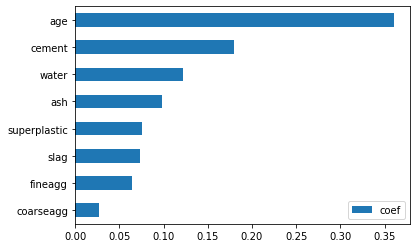

In [681]:
chart.plot(kind='barh', label='Importance');
plt.legend(loc='lower right');

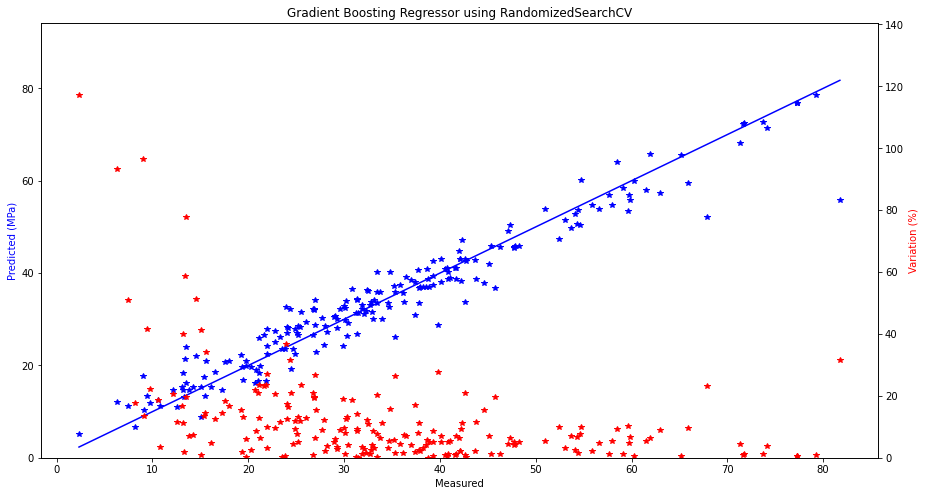

In [682]:
# Comparing prediction vs actual values

x = gb_line["measured"]
y1 = gb_line["predicted"]
y2 = gb_line["Variation"]

s_min = y_test.min()
s_max = y_test.max()

fig, ax1 = plt.subplots(figsize=(15,8))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*')
ax2.plot(x, y2, 'r*')

ax1.plot([s_min,s_max],[s_min,s_max], color='blue'); # Strength range values

ax1.set_title("Gradient Boosting Regressor using RandomizedSearchCV")
ax1.set_xlabel('Measured')
ax1.set_ylabel('Predicted (MPa)', color='blue')
ax2.set_ylabel('Variation (%)', color='r')

max1 = gb_line["predicted"].max()*1.2
max2 = gb_line["Variation"].max()*1.2
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()


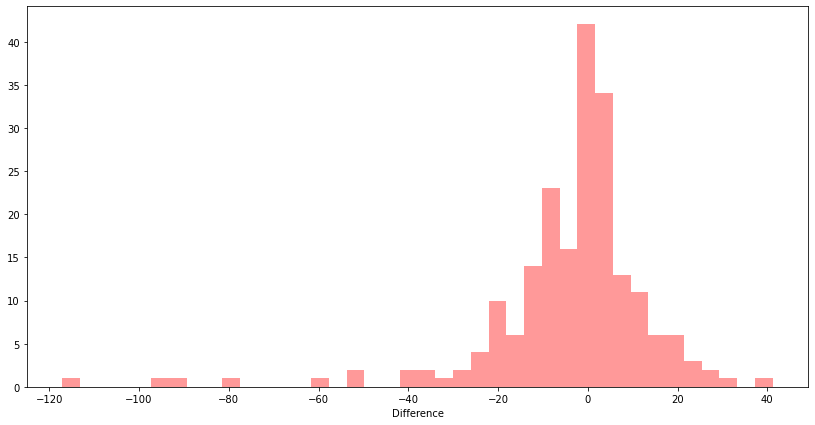

In [683]:
#gb_line["Variation"].plot(kind='hist')
sns.distplot(gb_line["Difference"],kde=False,color='red',bins=40)
fig = plt.gcf()
fig.set_size_inches( 14, 7)
#plt.xlim(-100, 100)

In [684]:
gb_line["Difference"].describe()

count    206.000000
mean      -4.043965
std       19.181018
min     -117.079768
25%       -9.519105
50%       -0.608452
75%        4.984604
max       41.176343
Name: Difference, dtype: float64

# 5. Final Model

In [685]:
# Copy data frame
df_1= df.copy()

In [686]:
#1.- concrete Outliers (Strength over 80)
print('Concrete Strength Outliers :',df_1.strength[df_1.strength>80].count())

Concrete Strength Outliers : 3


In [687]:
#1.- dropping concrete outliers
df_1 = df_1[df_1.strength<80]
print('initial data shape :', df.shape)
print('Data shape after dropping concrete strength outlayers :',df_1.shape)

initial data shape : (1030, 9)
Data shape after dropping concrete strength outlayers : (1027, 9)


In [688]:
#3.- water outliyers 
print('Water Outliers above 230:',df_1.water[df_1.water>230].count())
print('Water Outliers below 125:',df_1.water[df_1.water<125].count())

Water Outliers above 230: 4
Water Outliers below 125: 5


In [689]:
#3- dropping water outliers
df_1 = df_1[(df_1.water>125)&(df_1.water<230)]
print('data shape dropping water outliers :', df_1.shape)

data shape dropping water outliers : (1018, 9)


In [690]:
#4.- fine outliers
print('Fine Outliers above 950:',df_1.fineagg[df_1.fineagg>950].count())

Fine Outliers above 950: 5


In [691]:
#4- dropping fine outliers
df_1 = df_1[df_1.fineagg<950]
print('data shape dropping fineagg outliers :', df_1.shape)

data shape dropping fineagg outliers : (1013, 9)


In [692]:
#5.-Slag outliers
print('slag outliers above 350:',df_1.slag[df_1.slag>350].count())

slag outliers above 350: 2


In [693]:
#5- dropping fine outliers
df_1 = df_1[df_1.slag<350]
print('data shape dropping slag outliers :', df_1.shape)

data shape dropping slag outliers : (1011, 9)


In [694]:
#6.- Superplastic outliers
print('Superplastic outlayers above 25:',df_1.superplastic[df_1.superplastic>25].count())

Superplastic outlayers above 25: 10


In [695]:
#6- dropping superplastic outliers
df_1 = df_1[df_1.superplastic<25]
print('data shape dropping superplastic outliers :', df_1.shape)

data shape dropping superplastic outliers : (1001, 9)


In [696]:
#7.- dropping ash
df_1=df_1.drop(columns='ash')
df_1.shape

(1001, 8)

In [697]:
df_1=df_1.reset_index(drop=True)
df_1.shape

(1001, 8)

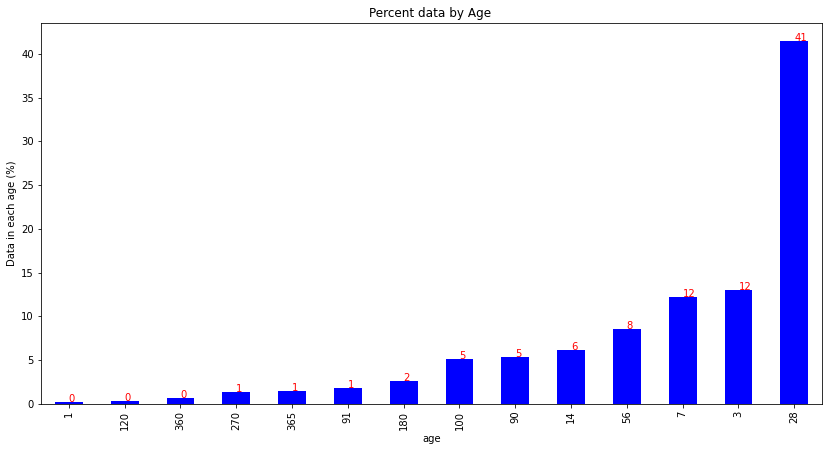

In [698]:
#
#from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder()
#  
#Encode labels in column 'species'. 
#df_1['age']= label_encoder.fit_transform(df_1['age']) 
  
cust_z =(df_1.groupby('age').age.count()/df_1.shape[0]).sort_values()*100
cust_z.plot(kind='bar', title='Percent data by Age ', color='b', figsize=(14,7))
plt.ylabel('Data in each age (%)')
for i, v in enumerate(cust_z):
    plt.text(i, v, int(v),color='r')

In [699]:
# number of data by age
df_1.groupby('age').age.count().sort_values()

age
1        2
120      3
360      6
270     13
365     14
91      18
180     26
100     51
90      54
14      61
56      86
7      122
3      130
28     415
Name: age, dtype: int64

In [700]:
# drop values below 1%
drop_age =[1,120,360,270,365] #,91,180]

In [701]:
# Dropping data with variation below 1% 
for ub in drop_age:
    print(ub)
    df_1=df_1[df_1.age!=ub]

df_1.shape

1
120
360
270
365


(963, 8)

In [702]:
df_1=df_1.reset_index(drop=True)

In [703]:
#df_1[df_1.age==1]

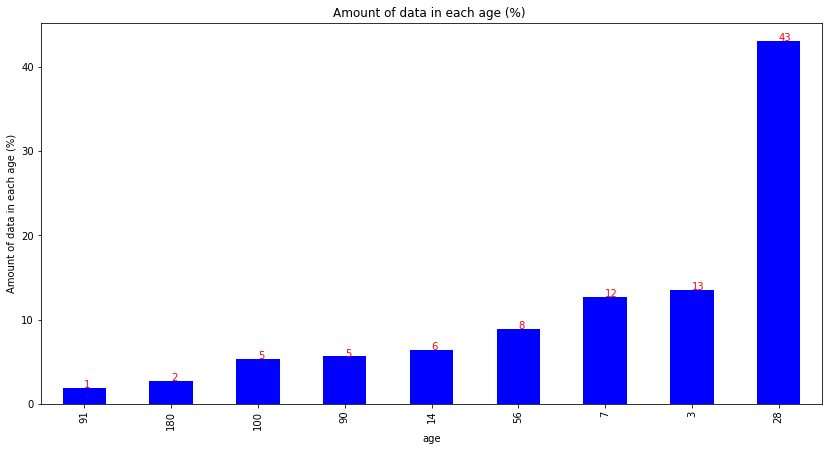

In [704]:
cust_z =round(df_1.groupby('age').age.count()/df_1.shape[0]*100,2).sort_values()
cust_z.plot(kind='bar', title='Amount of data in each age (%) ', color='b', figsize=(14,7))
plt.ylabel('Amount of data in each age (%)')
for i, v in enumerate(cust_z):
    plt.text(i, v, int(v),color='r')

In [705]:
# Independentes variables
X=df_1.drop(columns=['strength'])  # final data
y=df_1.strength
# Scalling
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#
# Split full data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
# Split train data between actual train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

<p style="color:blue"> 5.1.- RandomsearchCV </p>

In [706]:
lxgbr = xgb.XGBRegressor()
#
params={
    "n_estimators"     :[10,50,100,150,250,350,500],
    "learning_rate"    :[0.001, 0.05, 0.1, 0.5, 0.75, 0.1],
    "max_depth"        :[   1,    2,   3],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4],
    "colsample_bytree" :[0.3,   0.4,  0.5,  0.7]
}
#
random_searchxgbrl=RandomizedSearchCV(lxgbr,param_distributions=params,
                                 n_iter=10,n_jobs=-1,cv=10,verbose=3)

In [707]:
random_searchxgbrl.fit(X_train, y_train);
random_searchxgbrl.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


{'n_estimators': 250,
 'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.5,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [708]:
xgblrscvf = xgb.XGBRegressor(n_estimators=350, learning_rate=0.1, gamma=0.4, 
                            colsample_bytree=0.4, max_depth=3, min_child_weight= 5)
# 250  0.1  0.0 / 0.7 3 1
xgblrscvf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=350, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [709]:
xgb_traf = round(xgblrscvf.score(X_train, y_train),4)
xgb_valf = round(xgblrscvf.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', xgb_traf)
print('GradientBoostingRegressor - Validate score :', xgb_valf)

GradientBoostingRegressor - Train score : 0.9729
GradientBoostingRegressor - Validate score : 0.9402


In [710]:
xgb_testf = round(xgblrscvf.score(X_test, y_test),4)
print('RandomizedSearchCV - Test score :', xgb_testf)

RandomizedSearchCV - Test score : 0.9342


In [711]:
# Model prediction
y_pred2 = xgblrscvf.predict(X_test)
coef = xgblrscvf.feature_importances_

In [712]:
gb_linef = pd.DataFrame()
gb_linef["measured"] = y_test
gb_linef["predicted"] = y_pred2
gb_linef["Variation"] = abs((gb_linef["measured"]-gb_linef["predicted"])/gb_linef["measured"]*100) # percent variation
gb_linef["Difference"] = (gb_linef["measured"]-gb_linef["predicted"])/gb_linef["measured"]*100
#
#

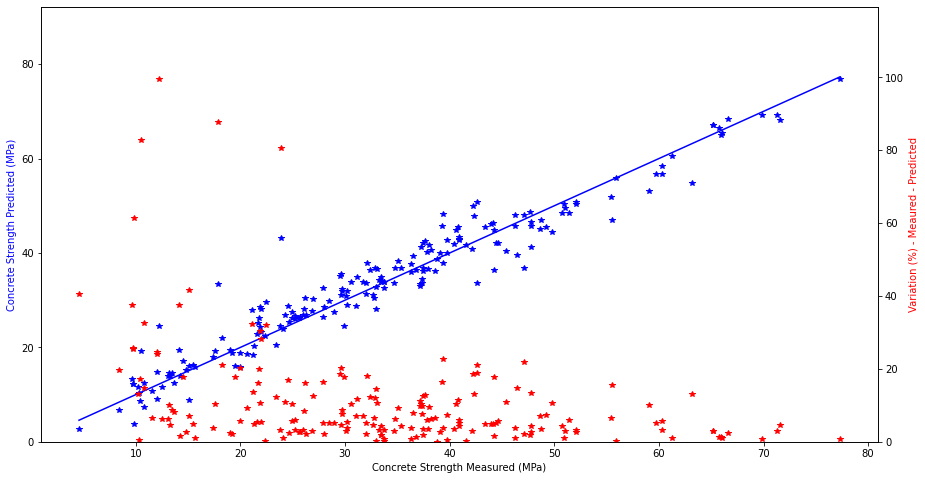

In [713]:
# Comparing prediction vs actual values

x = gb_linef["measured"]
y1 = gb_linef["predicted"]
y2 = gb_linef["Variation"]

s_min = y_test.min()
s_max = y_test.max()

fig, ax1 = plt.subplots(figsize=(15,8))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*')
ax2.plot(x, y2, 'r*')

ax1.plot([s_min,s_max],[s_min,s_max], color='blue'); # Strength range values


ax1.set_xlabel('Concrete Strength Measured (MPa)')
ax1.set_ylabel('Concrete Strength Predicted (MPa)', color='blue')
ax2.set_ylabel('Variation (%) - Meaured - Predicted', color='r')

max1 = gb_linef["predicted"].max()*1.2
max2 = gb_linef["Variation"].max()*1.2
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

In [714]:
gb_eqf = pd.DataFrame(index=X.columns)
gb_eqf["coef"] = coef
chartf = gb_eqf.sort_values(by='coef')
chartf

,coef
fineagg,0.049498
coarseagg,0.056083
slag,0.059930
water,0.093215
superplastic,0.105945
cement,0.198798
age,0.436531


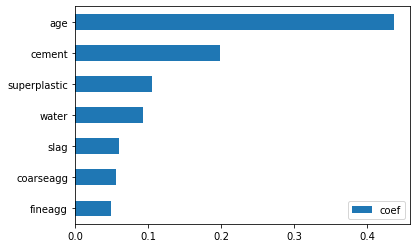

In [715]:
chartf.plot(kind='barh', label='Importance');
plt.legend(loc='lower right');

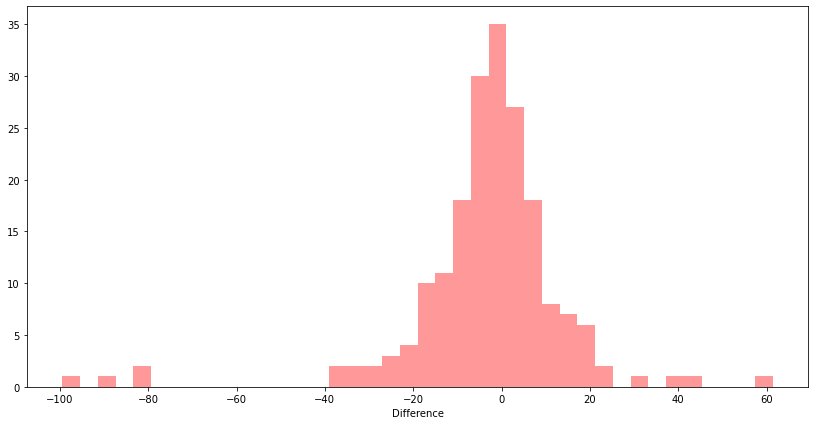

In [717]:
sns.distplot(gb_linef["Difference"],kde=False,color='red',bins=40)
fig = plt.gcf()
fig.set_size_inches( 14, 7)

In [718]:
gb_linef["Difference"].describe()

count    193.000000
mean      -3.378251
std       17.825854
min      -99.409781
25%       -8.857197
50%       -2.338706
75%        4.407503
max       61.383391
Name: Difference, dtype: float64

In [608]:
gb_linef[gb_linef["Difference"]>40]

,measured,predicted,Variation,Difference
175,9.85,3.803736,61.383391,61.383391
384,4.57,2.712763,40.639753,40.639753
18,15.04,8.766319,41.713303,41.713303


In [610]:
# data below and above 40% error variation
df_1.loc[[14,236,413,462,175,384,18],:]

,cement,slag,water,superplastic,coarseagg,fineagg,age,strength
14,167.0,187.0,185.0,7.0,898.0,636.0,28,23.89
236,200.0,0.0,180.0,0.0,1125.0,845.0,28,12.25
413,213.8,98.1,181.7,6.7,1066.0,785.5,14,17.84
462,145.4,0.0,201.7,7.8,824.0,868.7,28,10.54
175,202.0,11.0,206.0,1.7,942.0,801.0,3,9.85
384,102.0,153.0,192.0,0.0,887.0,942.0,3,4.57
18,190.7,0.0,162.1,7.8,1090.0,804.0,3,15.04


# 6.- Summary

1.- Data Analysis - Linear regression, REDGI, LASSO, and ElasticNet models were used with the following data:
        
    1.1.- Original data - no variation
            
    1.2.- The zero values in the drivers Ash, Slag and Superplastic were replaced by the median
            
    1.3.- The drivers Ash, slag, and superplastic were drop from the data
            
    Observation: At this step, best models is still using the original data without modifications. Age is the stronger driver in the data. Ash, Slag and Superplastic has the small percent of contribution in the mixture. 
                
2.- CroosValidation - Different models

    2.1.- Linear regression
            
    2.2.- Bagging Regressor
            
    2.3.- GradientBoostingRegressor
            
    2.4.- XGBoostingRegressor (Best model)
            
    2.5.-LGBM regressor
        
    Observation: from 2.2 to 2.5 models gave similar scores. XGBoostingRegressor gave less variation 
            
3.- Tuning - Using GridSearchCV and RandomizedSearchCV
    
    3.1.- RandomizedSearchCV gives a faster result and slithly lower than GridSearchCV
        
    3.2.- GradientBoostingRegressor and XGBoostingRegressor gave pretty similar results
        
    Observation: Charts showed were using XGBoostingRegressor (Data was splitted in train, validate and test sets)
            
4.- Final Model

    4.1.- Outliers were dropped from the original data
    
    4.2.- Ash driver was dropped because showed the lower importance in the calculations
    
    4.3.- Age data with less than 1.5% variation in the data was dropped
    
    4.4.- XGBoostingRegressor was used in the modeling
    
    Observation: final model improve the score or gave a better resutls (Score decreased from 93.77 to 93.42 but Erros SD decrease from 19.18% to 17.82%)
    

